# Problem 1: A/B Testing

Since currently, the company generates an average of \$1.50 per visit, so $\mu_{0} = 1.5$. The company decideds that change in revenue with a 1% change in either direction is significant enough to note, so $\mu_{1} = 1.5⋅(1.01) = 1.515$. The standard deviation $\sigma = 5.3$. The effect size is calculated by $ES = \frac{|\mu_{1} - \mu_{0}|}{\sigma}$ = $\frac{|1.515 - 1.5|}{5.3} = 0.0028$. Since we are assuming a 95% type-I error rate, the sample size required is $n = (\frac{Z_{1-α/2} \:+\: Z_{1-β}}{ES})^2 = \frac{1.96 \:+\: Z_{1 - β}}{0.0028}$. Here, $1 - β$ is the power of our test.

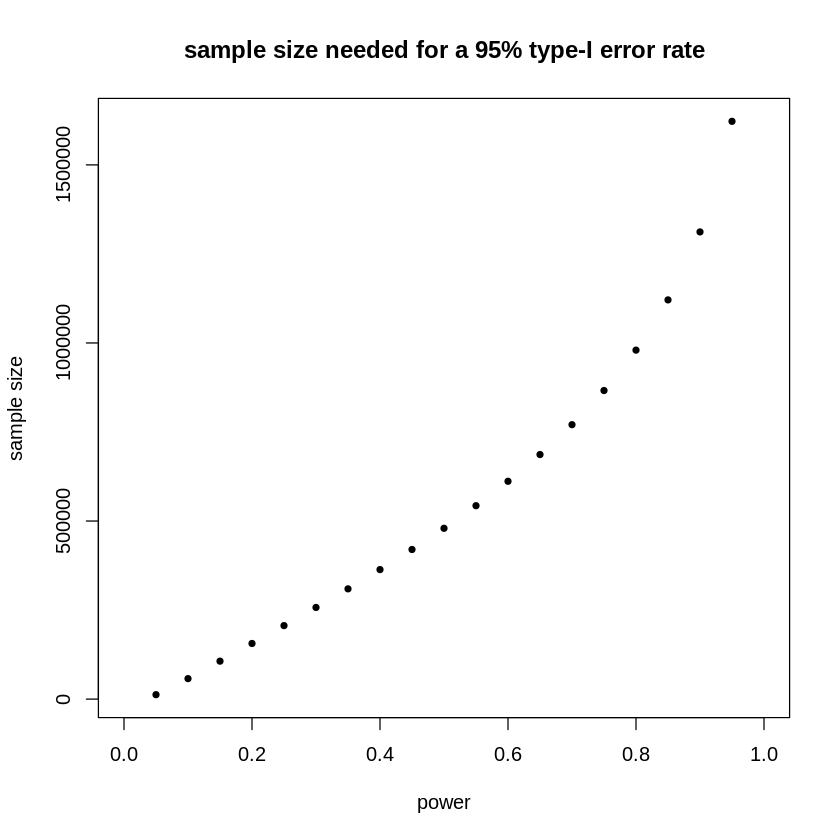

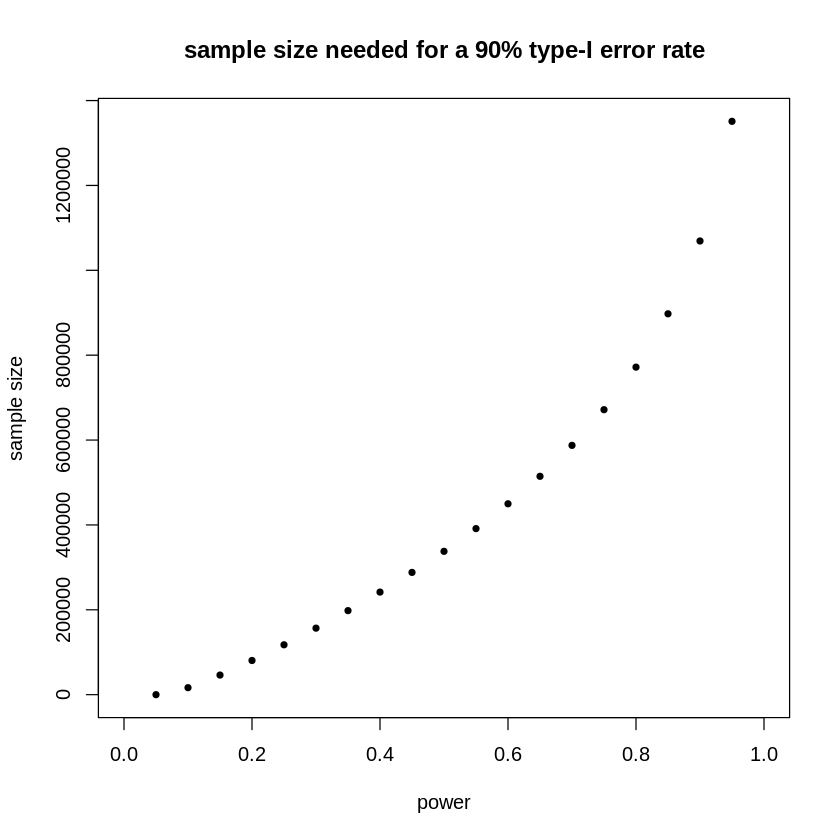

In [2]:
ES = (1.515 - 1.5) / 5.3
power = seq(0, 1, 0.05)
sample_size_95 = ((qnorm(1 - 0.05/2) + qnorm(power))/ES)^2
plot(power, sample_size_95, ylab = "sample size", main = "sample size needed for a 95% type-I error rate", pch = 20)
sample_size_90 = ((qnorm(1 - 0.1/2) + qnorm(power))/ES)^2
plot(power, sample_size_90, ylab = "sample size", main = "sample size needed for a 90% type-I error rate", pch = 20)

From two scatter plots, we can see that sample size needed for a 95% type-I error rate is much higher than a 90% type-I error rate with respect to the same power of the test. For 95% type-I error rate, I will recommend a sample size (visits) around 1300000 to ensure 90% power. For 90% type-I error rate, I will recommend a sample size (visits) around 1000000 to ensure 90% power. 

Power is defined as the probability of rejecting null hypothesis given the alternative hypothesis is true, which is represented as $1-β$. Type-I error rate is $α$. As $α$ increase, $Z_{1-α/2}$ will decrease, so the sample size will decrease. As $Β$ increase, $Z_{1-β}$ will decrease, so the sample size will decrease as well. As effect size increase, the sample size required will decrease. As variance increase, the effect size will decrease, so the sample size required will increase. 

# Problem 2: Missing Data Patterns 

In [3]:
data1 = read.csv("color_test.csv")
head(data1)
attach(data1)

,id,treat,est_age,past_cust,past_avg_rev,obs_rev
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,0,36.35849,0,NA,0.00000
2,2,0,31.47492,1,1.553581,0.00000
3,3,1,40.50781,0,NA,0.00000
4,4,0,36.68641,1,1.915854,0.00000
5,5,0,NA,1,0.000000,11.94924
6,6,0,40.05534,1,2.377523,0.00000


In [4]:
install.packages('naniar')
library(naniar)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
sum(!complete.cases(data1))  # 7843 rows have missing data 
nrow(data1) # total number of rows is 15000

[1] 7843

[1] 15000

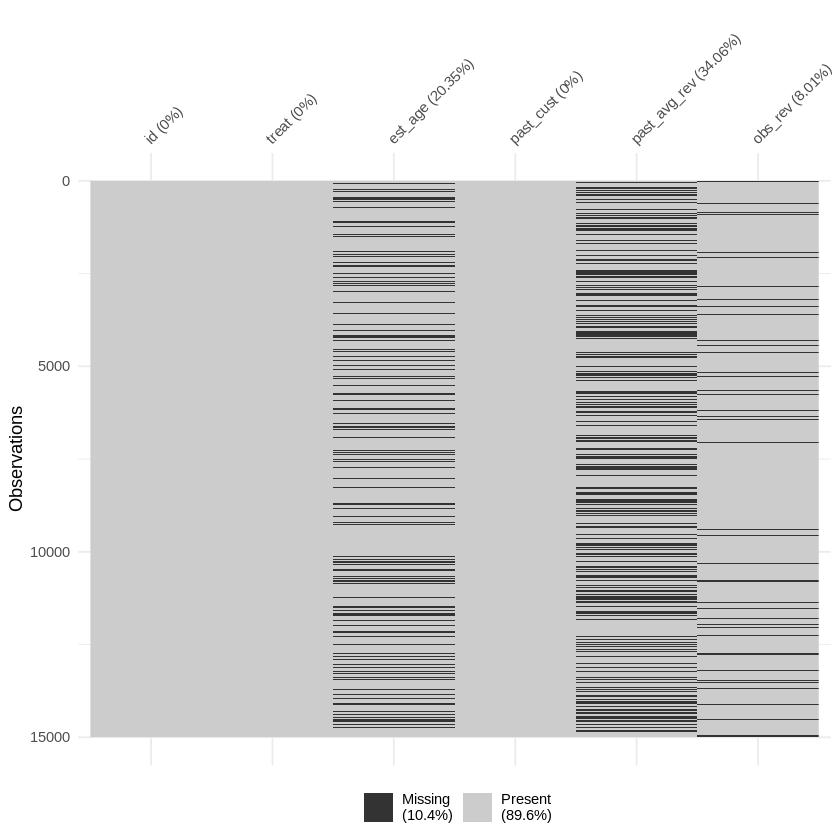

In [6]:
vis_miss(data1)

In [20]:
data1 = na.omit(data1) # after omitting the rows containing missing values, there are 7157 rows left 
nrow(data1)
head(data1)

[1] 7157

,id,treat,est_age,past_cust,past_avg_rev,obs_rev
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
2,2,0,31.47492,1,1.553581,0
4,4,0,36.68641,1,1.915854,0
6,6,0,40.05534,1,2.377523,0
7,7,0,40.05415,1,4.292266,0
9,9,1,45.25272,1,0.000000,0
10,10,1,35.90415,1,0.000000,0


From above graph, we can see that only columns est_age, past_avg_rev, and obs_rev contain missing data. Est_age has 20.35% missing data, past_avg_rev has 34.06% missing data, and obs_rev has 8.01% missing data. Est_age is MAR because it is estimated based on other variables. Past_avg_rev is mar becuase it represents past average revenue. When past_cust is 0 (a new customer), it is definitely NA. Obs_rev is MCAR becuase there is no relationship between the missingness of the data and any values, observed or missing. 

For this experiment, we can conduct complete-case analysis since after omitting all the rows containing missing values, we still have 7157 rows left, although this method may introduce bias to our analysis. 

In [22]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
women_weight <- genderweight %>%
  filter(group == "F") %>%
  pull(weight)
men_weight <- genderweight %>%
  filter(group == "M") %>%
  pull(weight)
# Compute t-test
res <- t.test(women_weight, men_weight)
res

In [26]:
treatment = data1 %>% filter(treat == 1) %>% select(obs_rev)
non_treatment = data1 %>% filter(treat == 0) %>% select(obs_rev)
t_test <- t.test(treatment, non_treatment)
t_test


	Welch Two Sample t-test

data:  treatment and non_treatment
t = 9.2936, df = 6765.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8975514 1.3774129
sample estimates:
mean of x mean of y 
 3.567782  2.430300 


Since the p-value is super small, we can reject the null hypothesis that $μ_{treatment} \:=\: μ_{nontreatment}$. In other words, there is enough evidence to state that the mean observed revenue for treatment group is different to that of the non-treatment group. The difference for the mean control and test revenue is $3.567782 - 2.4303 = 1.137482$.

# Problem 3: Exploratory Analysis

In [8]:
data2 = read.csv("US_Accidents_Dec20_updated.csv")

In [9]:
install.packages('dplyr')
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [10]:
head(data2)
summary(data2)
names(data2)
attach(data2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Description,⋯,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.,⋯,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,⋯,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,⋯,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,⋯,False,False,False,False,False,False,Night,Night,Night,Day
5,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,⋯,False,False,False,False,False,False,Night,Night,Day,Day
6,A-2716605,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.500,At Mitchell Ave/Exit 6 - Accident.,⋯,False,False,False,False,False,False,Day,Day,Day,Day


      ID               Severity    Start_Time          End_Time        
 Length:1316687     Min.   :1.0   Length:1316687     Length:1316687    
 Class :character   1st Qu.:2.0   Class :character   Class :character  
 Mode  :character   Median :2.0   Mode  :character   Mode  :character  
                    Mean   :2.2                                        
                    3rd Qu.:2.0                                        
                    Max.   :4.0                                        
                                                                       
   Start_Lat       Start_Lng          End_Lat         End_Lng       
 Min.   :24.57   Min.   :-124.50   Min.   :24.57   Min.   :-124.50  
 1st Qu.:33.85   1st Qu.:-118.24   1st Qu.:33.85   1st Qu.:-118.24  
 Median :37.15   Median : -94.60   Median :37.15   Median : -94.60  
 Mean   :36.80   Mean   : -98.89   Mean   :36.80   Mean   : -98.89  
 3rd Qu.:40.67   3rd Qu.: -80.88   3rd Qu.:40.67   3rd Qu.: -80.87  
 Max.   :4

[1] "ID"                    "Severity"              "Start_Time"           
 [4] "End_Time"              "Start_Lat"             "Start_Lng"            
 [7] "End_Lat"               "End_Lng"               "Distance.mi."         
[10] "Description"           "Number"                "Street"               
[13] "Side"                  "City"                  "County"               
[16] "State"                 "Zipcode"               "Country"              
[19] "Timezone"              "Airport_Code"          "Weather_Timestamp"    
[22] "Temperature.F."        "Wind_Chill.F."         "Humidity..."          
[25] "Pressure.in."          "Visibility.mi."        "Wind_Direction"       
[28] "Wind_Speed.mph."       "Precipitation.in."     "Weather_Condition"    
[31] "Amenity"               "Bump"                  "Crossing"             
[34] "Give_Way"              "Junction"              "No_Exit"              
[37] "Railway"               "Roundabout"            "Station"              
[40] "Stop"                  "Traffic_Calming"       "Traffic_Signal"       
[43] "Turning_Loop"          "Sunrise_Sunset"        "Civil_Twilight"       
[46] "Nautical_Twilight"     "Astronomical_Twilight"

[1] 999872

[1] 1316687

Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


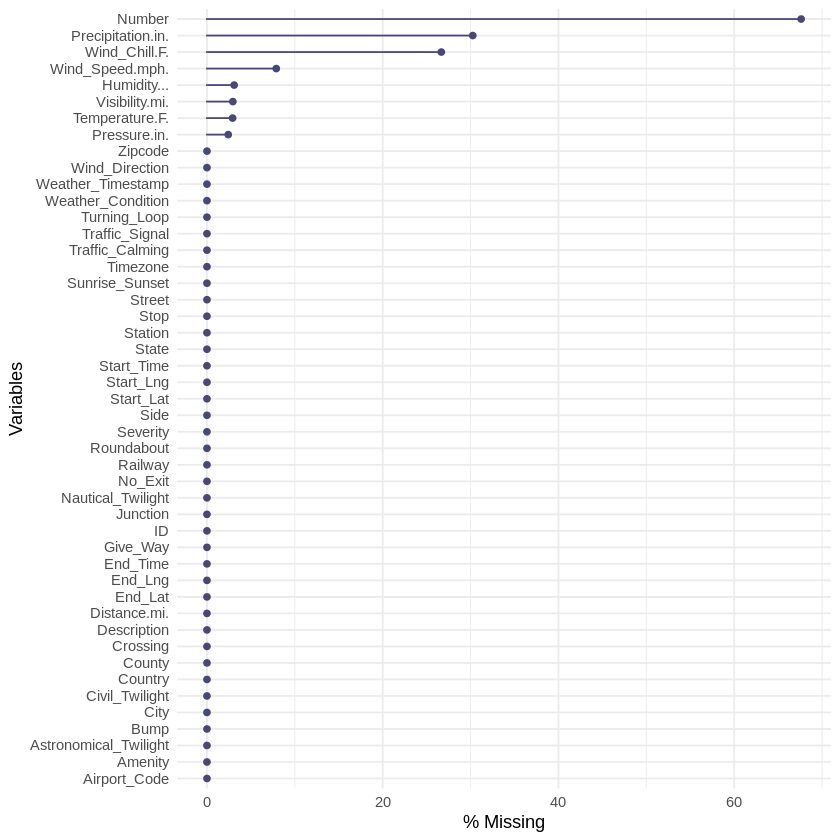

In [11]:
sum(!complete.cases(data2))  # 999872 rows have missing data 
nrow(data2)
gg_miss_var(data2,show_pct = TRUE)

From above graph, we can see that almost 70% of the data in column number is missing; 33% of data in column percipitation.in. is missing; 30% of data in column wind_chill.f. is missing; 8% of data in column wind_speed.mph. is missing. There are total eight columns contain missing values. The other four columns don't contain a lot of missing data, rougly around 3%. 

[1] 10198

          City     n
1  Los Angeles 35818
2        Miami 33139
3    Charlotte 19692
4   Sacramento 17122
5      Houston 16827
6       Dallas 16336
7      Orlando 14324
8    San Diego 12583
9     Portland 12309
10 Minneapolis 11451
11  Saint Paul  9219
12     Atlanta  9110
13     Raleigh  8719
14     Chicago  8474
15     Phoenix  8392
16    San Jose  8117
17    Richmond  7848
18   Riverside  7481
19   Nashville  7439
20 Baton Rouge  6856


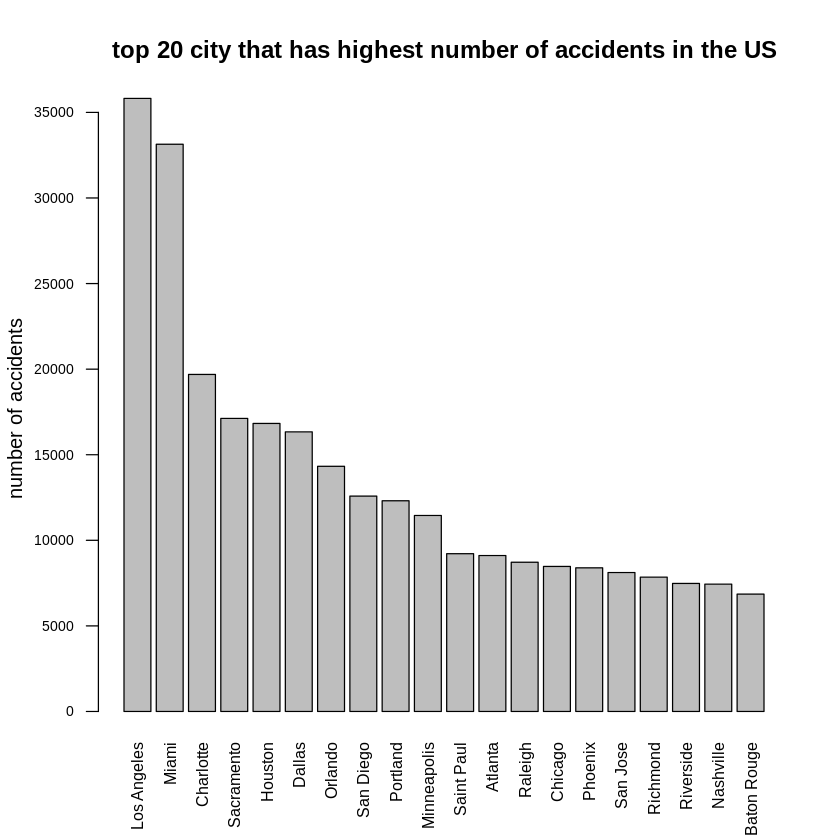

In [12]:
number_cities = nrow(unique(select(data2, City)))
number_cities # there are total 10658 unique cities in the dataset
top20 = data2 %>% count(City, sort = TRUE) %>% slice(1:20)
print(top20)

barplot(height = top20$n, names.arg = top20$City,las = 2, cex.axis = 0.7, cex.names = 0.8, main = "top 20 city that has highest number of accidents in the US")
title(ylab = "number of accidents")

The above barplot shows the top 20 city in the US that has highest number of accidents. Both Los Angeles and Miami have extremely high number of accidents, more than 30000 cases.City in the third place even doesn't exceed 20000 cases. All the cities after Miami experience a steady decrease in number of accidents. 

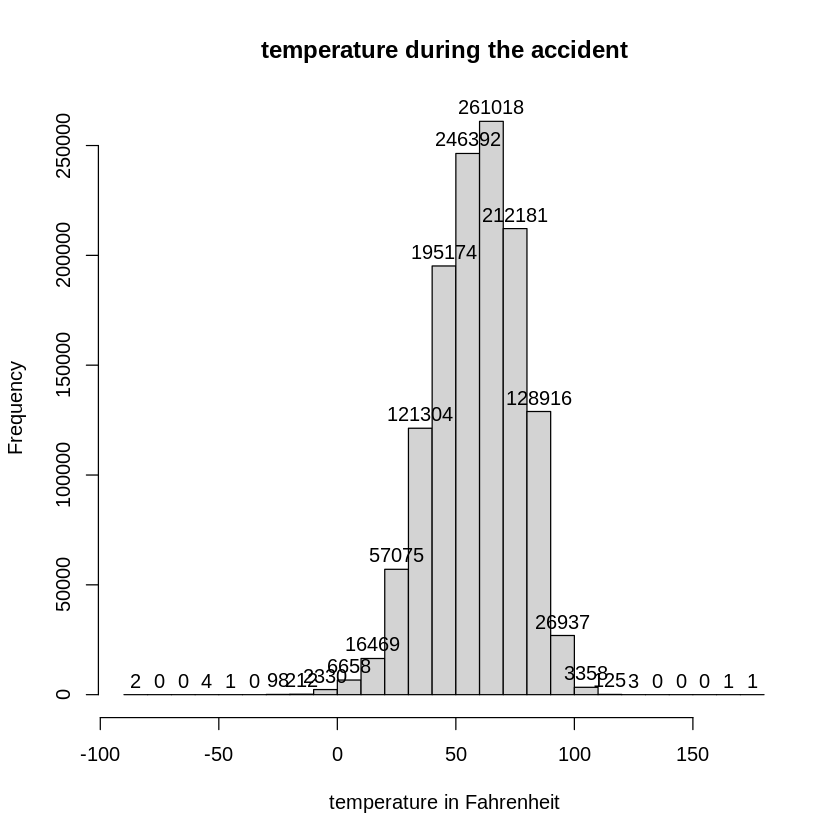

In [13]:
hist(Temperature.F., breaks = 20, main = "temperature during the accident", xlab = "temperature in Fahrenheit", labels = TRUE)

Above graph shows the local terperature when the accident happened. We can see the most common temperature range during accident is from 60 to 70 Fahrenheit. 

[1] 111

Weather_Condition,n
<chr>,<int>
Fair,432670
Mostly Cloudy,164722
Cloudy,149902
Clear,136277
Partly Cloudy,111444
Overcast,66749
Light Rain,63259
,38311
Scattered Clouds,35874


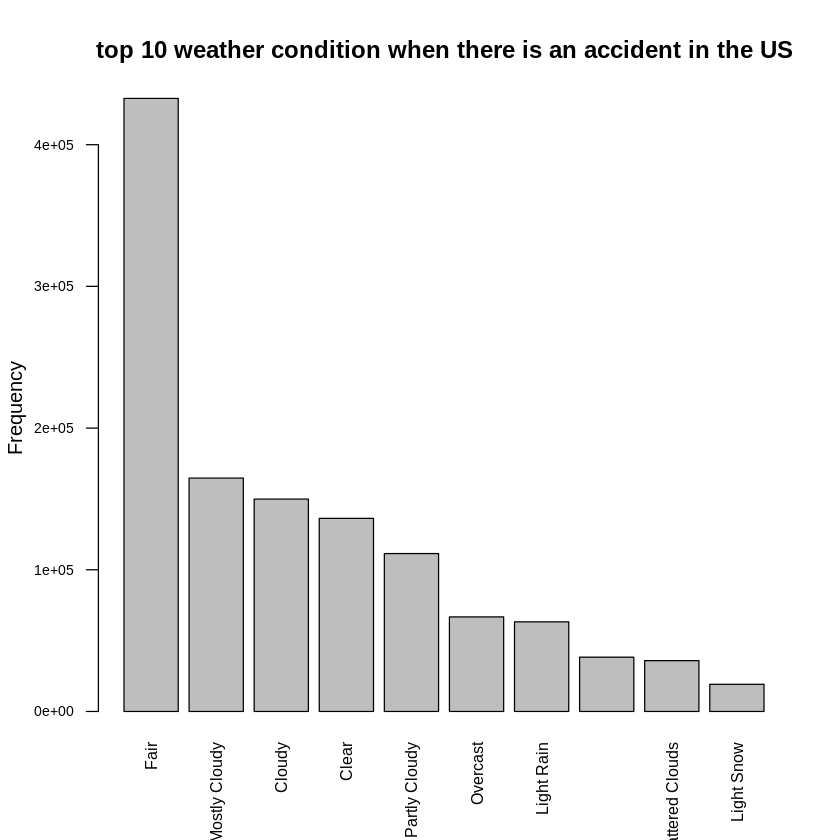

In [14]:
#number_cities = nrow(unique(select(data2, City)))
#number_cities # there are total 10658 unique cities in the dataset
#top20 = data2 %>% count(City, sort = TRUE) %>% slice(1:20)
#print(top20)
weather = nrow(unique(select(data2, Weather_Condition)))
weather # there are total 111 unique weather situation
top10 = data2 %>% count(Weather_Condition, sort = TRUE) %>% slice(1:10)
top10
barplot(height = top10$n, names.arg = top10$Weather_Condition,las = 2, cex.axis = 0.7, cex.names = 0.8, main = "top 10 weather condition when there is an accident in the US")
title(ylab = "Frequency")

From above graph, we can see that there are more than 400000 times when the accident happened and the weather condition is fair. After that, weather condition associates with the second highest and third highest accident rate is mostly cloudy and cloudy. Fair condition contributes the most compared to others and has extremely high frequency. 

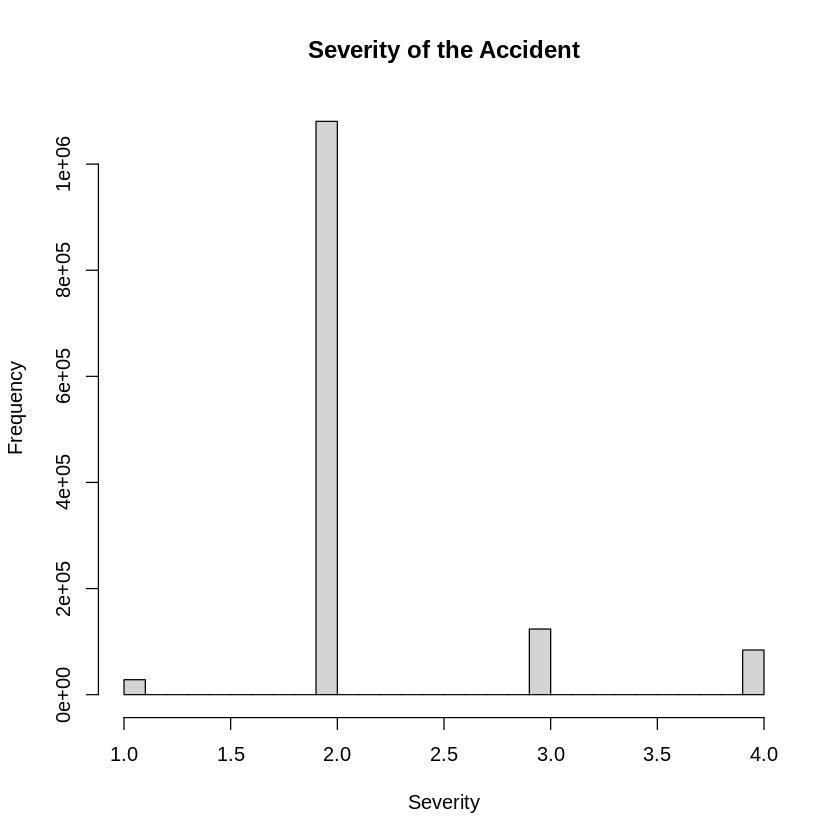

In [15]:
hist(Severity, main = "Severity of the Accident")

Above graph show the severity of all the accidents. One indicates the least impact and four indicates a significant impact. We can see that for most of the cases, the severity is 2, meaning that most of the accidents is somewhat severe, but not that severe. 

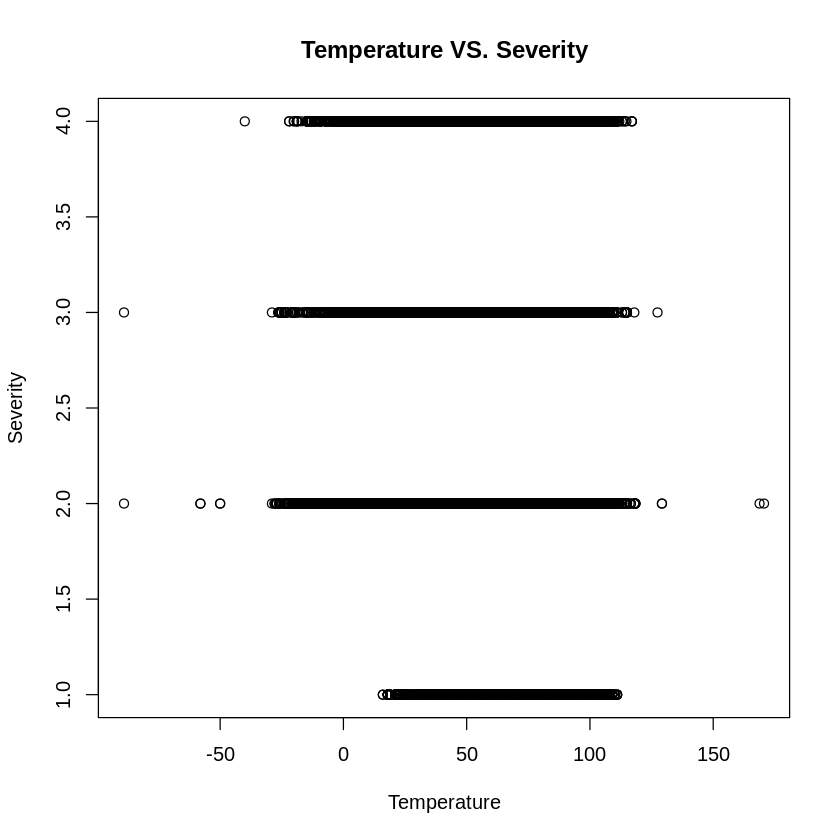

In [16]:
plot(x=Temperature.F., y=Severity, xlab="Temperature", ylab="Severity", main = "Temperature VS. Severity")

From above plot, we can see that temperature ranges from -20F to 110F all have led to a car accident with severity from 2 to 4. The only exception is that when the severity is 1, the temperature associates with is from approximately 15F to 110F. 

In [17]:
library(ggplot2)

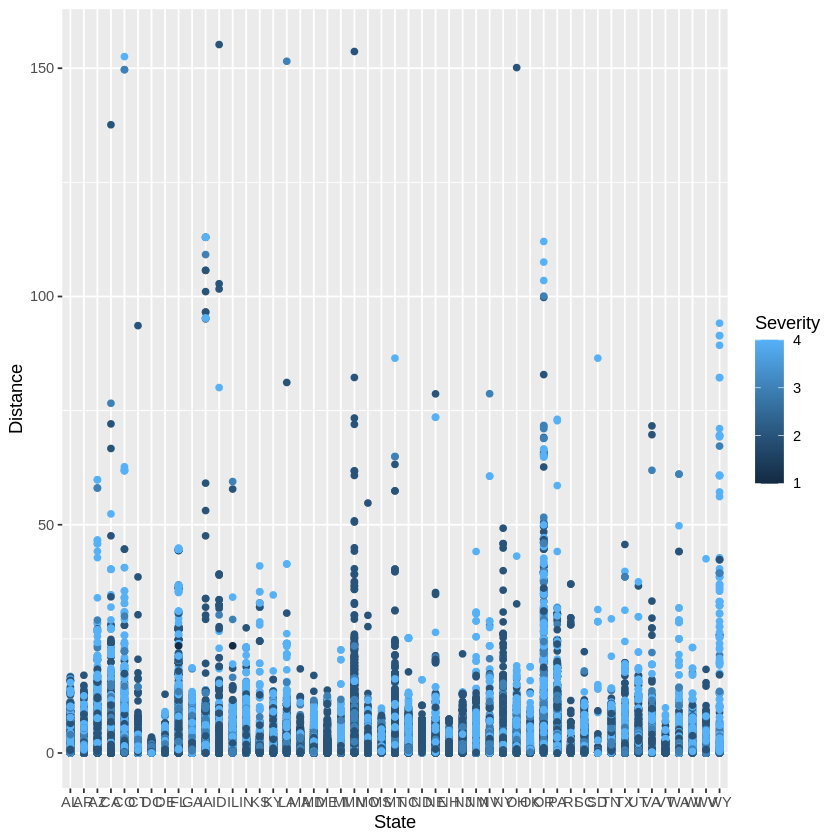

In [19]:
p = ggplot(data = data2)
p = p + geom_point(aes(x=State, y=Distance.mi., group=Severity, color=Severity))
p = p + xlab("State") + ylab("Distance") 
p

From above graph, we can see that in each state, the length of the road extent affected by the accident (distance) is distributed almost the same. Most of them are clustered around range 0 to 25. Moreover, the severeity of the accidents also doesn't depend on which state you are in and the road extent affected by the accident. The severity is pretty much mixed up in all the states. 

In [28]:
number_states = nrow(unique(select(data2, State)))
number_states # there are total 49 unique states in the dataset

[1] 49

   State      n
1     CA 408771
2     FL 136856
3     OR  74653
4     TX  62390
5     NY  51546
6     MN  49256
7     VA  44853
8     NC  43935
9     PA  40541
10    IL  32635
11    MD  29750
12    AZ  26139
13    SC  25944
14    UT  24882
15    NJ  24612
16    GA  23822
17    MI  20846
18    TN  19224
19    LA  18204
20    OH  17948


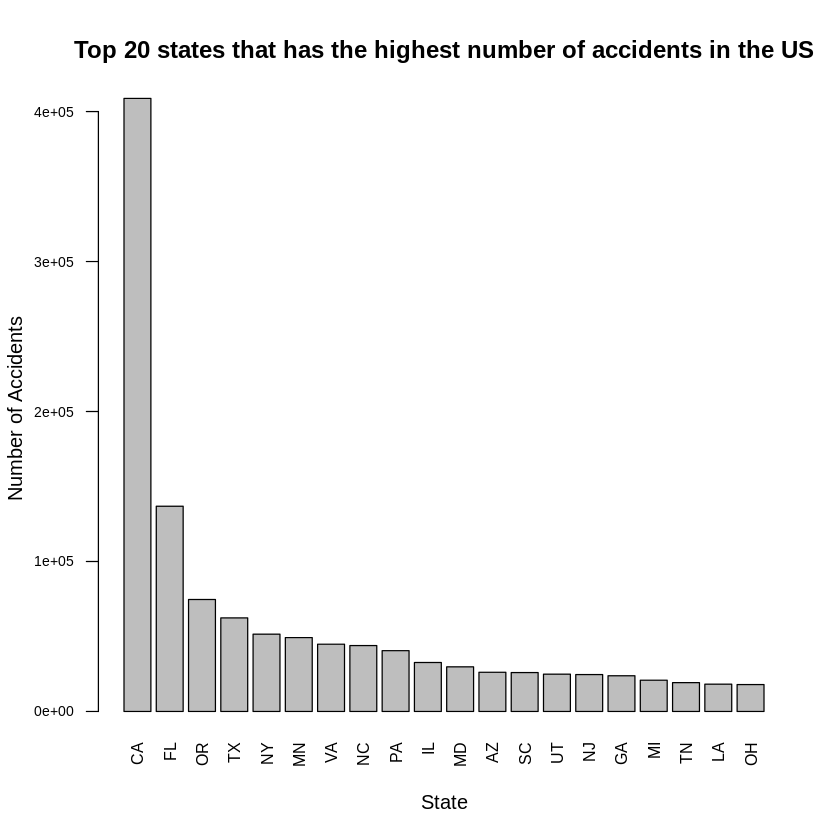

In [34]:
top20_state = data2 %>% count(State, sort = TRUE) %>% slice(1:20)
print(top20_state)
barplot(height = top20_state$n, names.arg = top20_state$State,las = 2, cex.axis = 0.7, cex.names = 0.8, main = "Top 20 states that has the highest number of accidents in the US",
ylab = "Number of Accidents", xlab = "State")

I think this dataset is representative of the general distribution of accidents in the US since it has a lot of data points and it covers nearly every state in the US. This dataset contains information about 49 states and there are 50 states in the US. One thing I notice is that California has much more accidents than all the other states. In general, I think this dataset reflects the distribution of accidents in the US. 